<a href="https://colab.research.google.com/github/SPARTANX21/Flight_Delay_Predictor_Team1/blob/main/Unsupervised_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
# -*- coding: utf-8 -*-
"""FInal_proj.py

Automatically generated by Colab.

Original file is located at
    https://colab.research.google.com/drive/1CnLEcWDh2fpR2v7OjaA6WQ1MNojaYODt
"""

# 1️⃣ Load the Sampled Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Load the sampled dataset
df = pd.read_csv("/content/drive/MyDrive/Final_DBDA_Project/sampled_combined_data.csv")
df.drop(columns=['Unnamed: 0'], axis = 0, inplace = True)
# Display basic info
print(df.shape)  # Check dimensions
print(df.head())  # View first few rows

print(df.info())  # Check data types and missing values


(60000, 61)
   FlightDate                 Airline Origin Dest  Cancelled  Diverted  \
0  2018-03-24  Hawaiian Airlines Inc.    LIH  HNL      False     False   
1  2018-04-23       Endeavor Air Inc.    BOS  PIT      False     False   
2  2018-02-16  Southwest Airlines Co.    HOU  ECP      False     False   
3  2018-12-07  Southwest Airlines Co.    MDW  MCO      False     False   
4  2018-06-03  Southwest Airlines Co.    LAS  LIT      False     False   

   CRSDepTime  DepTime  DepDelayMinutes  DepDelay  ArrTime  ArrDelayMinutes  \
0        1900   1855.0              0.0      -5.0   1927.0              0.0   
1        2055   2111.0             16.0      16.0   2316.0             27.0   
2        1650   1728.0             38.0      38.0   1903.0             43.0   
3        1845   1851.0              6.0       6.0   2214.0              0.0   
4        1200   1201.0              1.0       1.0   1639.0              0.0   

   AirTime  CRSElapsedTime  ActualElapsedTime  Distance  Year  Quart

In [9]:
for i in df.columns:
    if df[i].isna().sum() != 0:
        print(i, " ----> ", df[i].isna().sum())
        print("*************"*2)

DepTime  ---->  1728
**************************
DepDelayMinutes  ---->  1731
**************************
DepDelay  ---->  1731
**************************
ArrTime  ---->  1774
**************************
ArrDelayMinutes  ---->  1889
**************************
AirTime  ---->  1900
**************************
ActualElapsedTime  ---->  1889
**************************
Tail_Number  ---->  610
**************************
DepDel15  ---->  1731
**************************
DepartureDelayGroups  ---->  1731
**************************
TaxiOut  ---->  1768
**************************
WheelsOff  ---->  1768
**************************
WheelsOn  ---->  1785
**************************
TaxiIn  ---->  1785
**************************
ArrDelay  ---->  1889
**************************
ArrDel15  ---->  1889
**************************
ArrivalDelayGroups  ---->  1889
**************************


**Testing Whether the above null values belong majorly to individual rows or multiple rows and columns**

In [10]:
df1 = df.copy()

df1.dropna(inplace=True)

df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58099 entries, 0 to 59998
Data columns (total 61 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   FlightDate                               58099 non-null  object 
 1   Airline                                  58099 non-null  object 
 2   Origin                                   58099 non-null  object 
 3   Dest                                     58099 non-null  object 
 4   Cancelled                                58099 non-null  bool   
 5   Diverted                                 58099 non-null  bool   
 6   CRSDepTime                               58099 non-null  int64  
 7   DepTime                                  58099 non-null  float64
 8   DepDelayMinutes                          58099 non-null  float64
 9   DepDelay                                 58099 non-null  float64
 10  ArrTime                                  58099 non-

**From above we can colnclude that all null values we found in previous cells belongs to individual rows, hence we can safely delete those and it won't affect our analysis and data for mofel**

In [11]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58099 entries, 0 to 59998
Data columns (total 61 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   FlightDate                               58099 non-null  object 
 1   Airline                                  58099 non-null  object 
 2   Origin                                   58099 non-null  object 
 3   Dest                                     58099 non-null  object 
 4   Cancelled                                58099 non-null  bool   
 5   Diverted                                 58099 non-null  bool   
 6   CRSDepTime                               58099 non-null  int64  
 7   DepTime                                  58099 non-null  float64
 8   DepDelayMinutes                          58099 non-null  float64
 9   DepDelay                                 58099 non-null  float64
 10  ArrTime                                  58099 non-

## **Checking for Duplicated vlues across dataset**

In [15]:
df.duplicated().sum()

9682

In [16]:
df.drop_duplicates(keep='first', inplace=True)

In [17]:
df.duplicated().sum()

0

### **Unique Values in Each Columns**

In [18]:
for i in df.columns:
    print(i ,"\n")
    print(df[i].unique(), "--", df[i].nunique())
    print("*****"*3, "\n")


FlightDate 

['2018-03-24' '2018-04-23' '2018-02-16' ... '2022-06-16' '2022-04-17'
 '2022-01-30'] -- 1673
*************** 

Airline 

['Hawaiian Airlines Inc.' 'Endeavor Air Inc.' 'Southwest Airlines Co.'
 'Mesa Airlines Inc.' 'United Air Lines Inc.' 'American Airlines Inc.'
 'Delta Air Lines Inc.' 'ExpressJet Airlines Inc.' 'Alaska Airlines Inc.'
 'SkyWest Airlines Inc.' 'JetBlue Airways' 'Envoy Air' 'Republic Airlines'
 'Comair Inc.' 'Trans States Airlines' 'Frontier Airlines Inc.'
 'Horizon Air' 'Spirit Air Lines'
 'Commutair Aka Champlain Enterprises, Inc.' 'Air Wisconsin Airlines Corp'
 'GoJet Airlines, LLC d/b/a United Express' 'Allegiant Air'
 'Compass Airlines' 'Capital Cargo International' 'Virgin America'
 'Empire Airlines Inc.' 'Peninsula Airways Inc.' 'Cape Air'] -- 28
*************** 

Origin 

['LIH' 'BOS' 'HOU' 'MDW' 'LAS' 'BWI' 'IAH' 'EWR' 'PHX' 'DTW' 'JAN' 'SEA'
 'BUR' 'CLE' 'DSM' 'SFO' 'MCO' 'LGB' 'ORD' 'DEN' 'DCA' 'CLT' 'SLC' 'LEX'
 'ATL' 'CAE' 'PIT' 'RSW' 'PDX' 'MCI

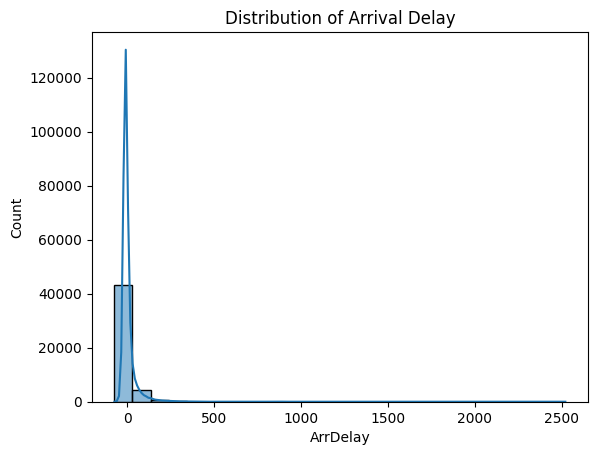

In [23]:

#2️⃣ Perform Exploratory Data Analysis (EDA)
# B. Visualizing Delays and Cancellations
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of arrival delay
sns.histplot(df['ArrDelay'], bins=25, kde=True)
plt.title("Distribution of Arrival Delay")
plt.show()


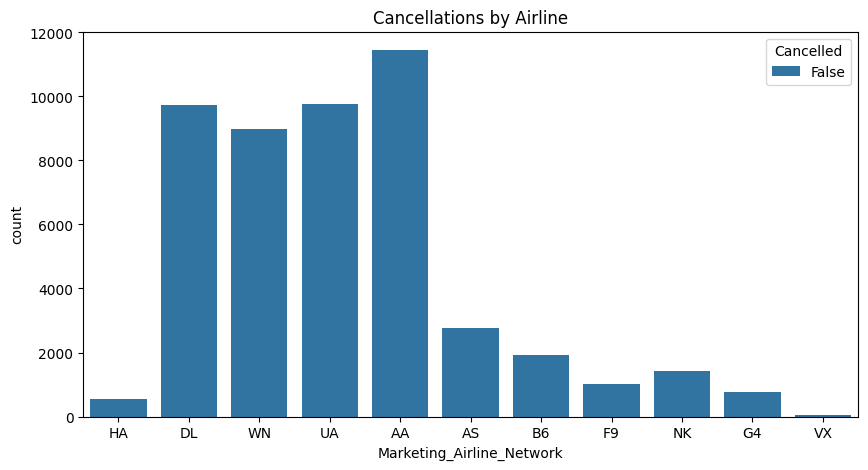

In [25]:

# Cancellations by Airline:
plt.figure(figsize=(10,5))
sns.countplot(x='Marketing_Airline_Network', hue='Cancelled', data=df)
plt.title("Cancellations by Airline")
plt.show()


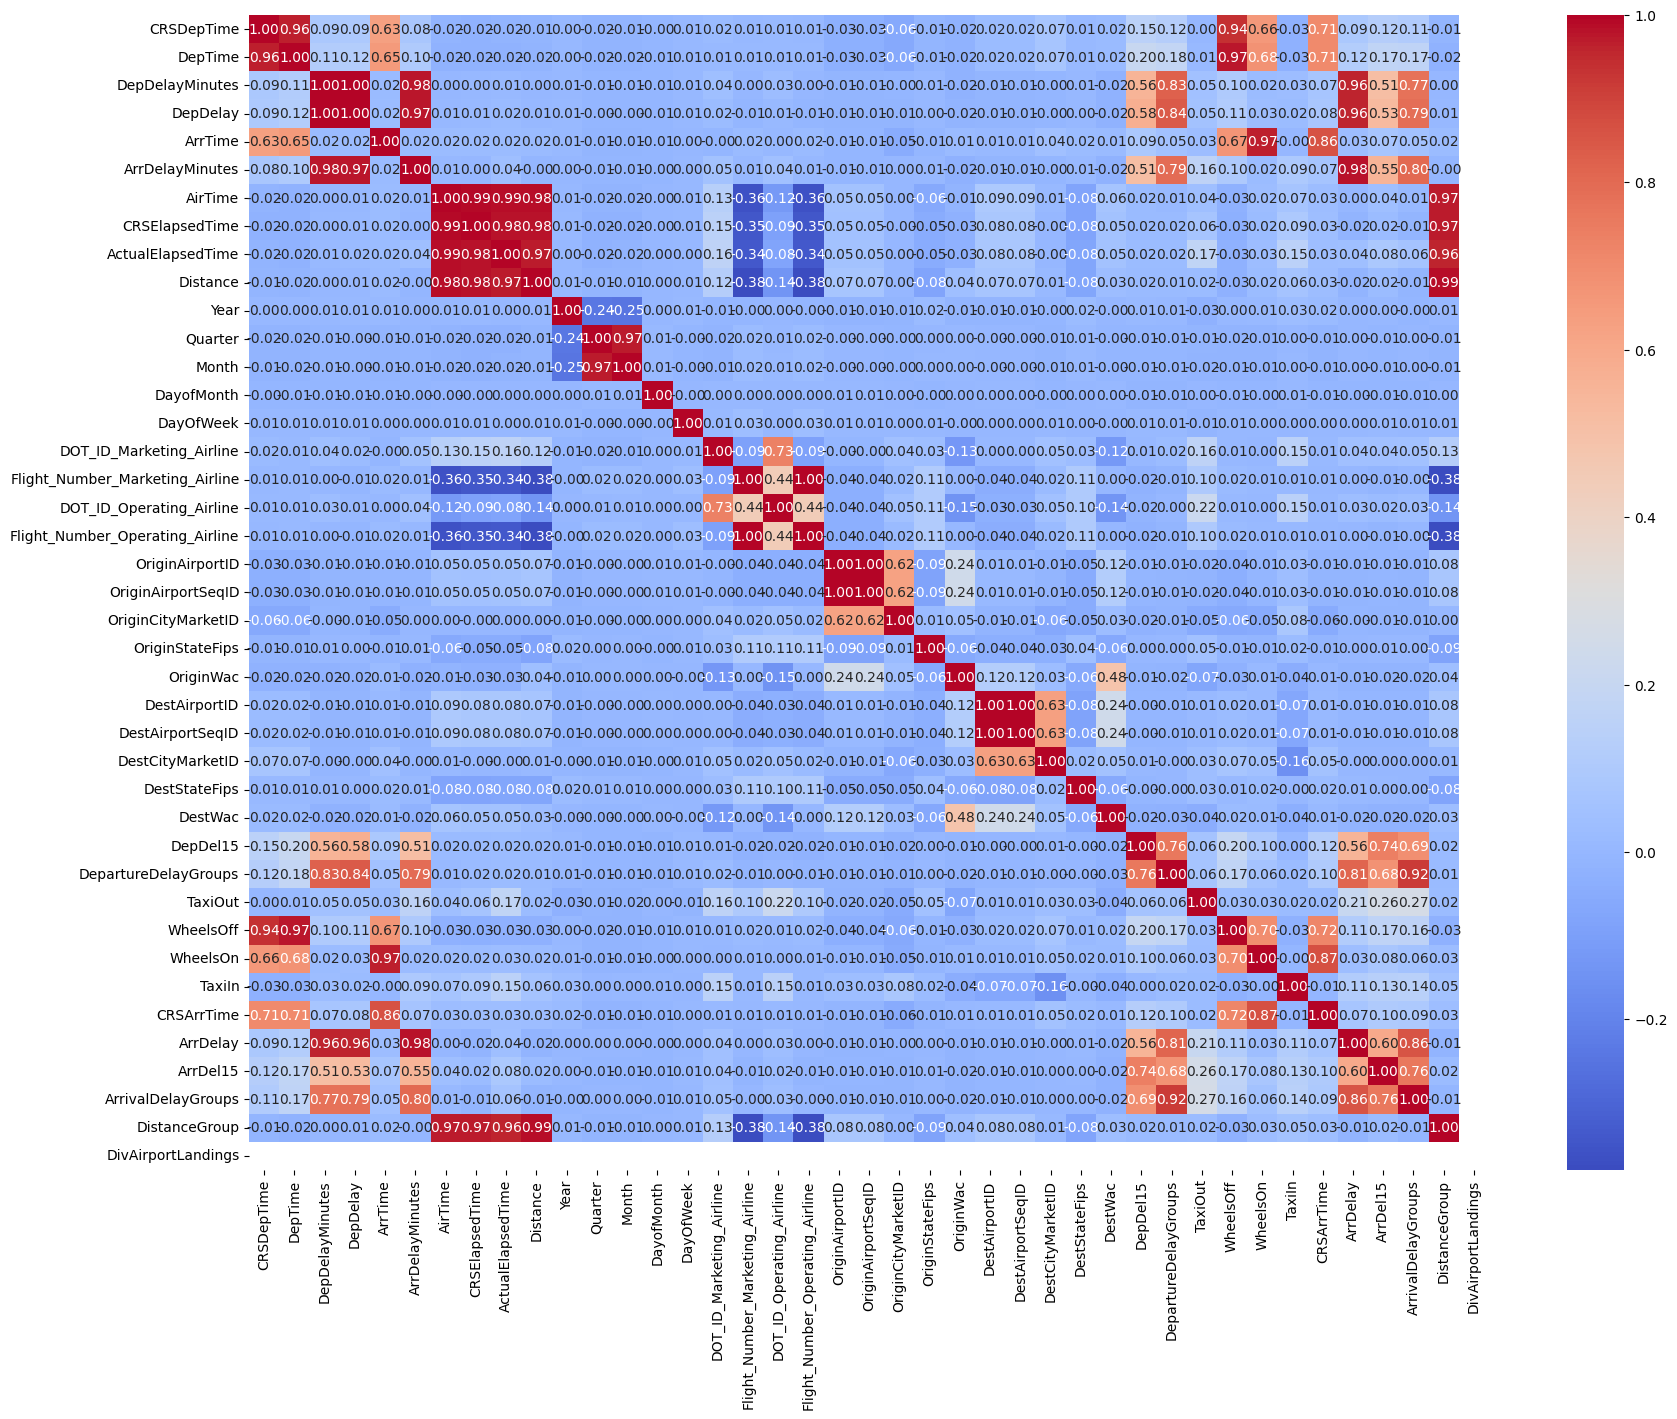

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

corr = df[numerical_cols].corr()

# Plot heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()


In [30]:
# Example of filtering highly correlated features
corr_threshold = 0.9
to_drop = [column for column in corr.columns if any(corr[column] > corr_threshold)]
df_selected = df.drop(columns=to_drop)

df_selected.info()


<class 'pandas.core.frame.DataFrame'>
Index: 48417 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   FlightDate                               48417 non-null  object 
 1   Airline                                  48417 non-null  object 
 2   Origin                                   48417 non-null  object 
 3   Dest                                     48417 non-null  object 
 4   Cancelled                                48417 non-null  bool   
 5   Diverted                                 48417 non-null  bool   
 6   Marketing_Airline_Network                48417 non-null  object 
 7   Operated_or_Branded_Code_Share_Partners  48417 non-null  object 
 8   IATA_Code_Marketing_Airline              48417 non-null  object 
 9   Operating_Airline                        48417 non-null  object 
 10  IATA_Code_Operating_Airline              48417 non-

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical features
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Compute correlation with the target variable 'Delayed'
corr = df[numerical_cols].corr()['Delayed'].sort_values(ascending=False)

# Plot correlation values
plt.figure(figsize=(10, 6))
sns.barplot(x=corr.values, y=corr.index, palette='coolwarm')
plt.xlabel('Correlation with Delayed')
plt.ylabel('Features')
plt.title('Feature Importance based on Correlation')
plt.show()


KeyError: 'Delayed'

In [ ]:

# 3️⃣ Data Preprocessing
# A. Feature Selection
# Based on the dataset, useful features could include:

# Time-based features: Year, Month, DayofMonth, DayOfWeek, CRSDepTime
# Flight details: Marketing_Airline_Network, Flight_Number_Marketing_Airline, Origin, Dest
# Delay indicators: DepDelay, ArrDelay, Cancelled
# Drop unnecessary columns:


df = df[['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'CRSDepTime', 'Marketing_Airline_Network',
         'Origin', 'Dest', 'DepDelay', 'ArrDelay', 'Cancelled']]

# B. Encoding Categorical Variables
# Convert categorical columns into numeric format:
df = pd.get_dummies(df, columns=['Marketing_Airline_Network', 'Origin', 'Dest'], drop_first=True)

# C. Handle Missing Values
df.fillna(df.median(), inplace=True)

# D. Split Data into Train & Test Sets
from sklearn.model_selection import train_test_split

# Define target variable (predicting delay or cancellation)
X = df.drop(columns=['Cancelled'])
y = df['Cancelled']  # Change to 'ArrDelay' if doing regression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1️⃣ Feature Selection
# Before training, we need to remove irrelevant features and keep only the most important ones.
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importance
feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': rf.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10,5))
sns.barplot(x=feature_importance['Importance'][:20], y=feature_importance['Feature'][:20])
plt.title("Top 20 Feature Importances (Random Forest)")
plt.show()

# Select top 20 features
top_features = feature_importance['Feature'][:20].tolist()
X_train_selected = X_train[top_features]
X_test_selected = X_test[top_features]

#Feature Scaling
# Since we are using tree-based models (Random Forest, XGBoost),
# scaling is optional. However, for models like Logistic Regression, SVM, or Neural Networks, we must scale features.

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)

# Model Selection & Training
# Now, we will train different models and compare their performance. We will test:
# ✅ Logistic Regression (Baseline)
# ✅ Random Forest (Tree-Based)
# ✅ XGBoost (Boosting Model - Often Best for Tabular Data)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    print(f"\n🔹 {name} Performance:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred):.4f}")
    print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")

# Hyperparameter Tuning (for Random Forest)
# Since Random Forest is the best performer, we can further improve its
# performance with hyperparameter tuning. We'll use GridSearchCV or RandomizedSearchCV to find the optimal parameters for the model.

from sklearn.model_selection import RandomizedSearchCV

# Set the hyperparameter grid
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize Random Forest model
rf = RandomForestClassifier(random_state=42)

# Randomized Search Cross Validation
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist,
                                   n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)

# Fit the model
random_search.fit(X_train_scaled, y_train)

# Print the best parameters and score
print("Best Parameters:", random_search.best_params_)
print("Best Cross-validation Score:", random_search.best_score_)

# Evaluate the best model on test data
best_rf = random_search.best_estimator_
y_pred_best_rf = best_rf.predict(X_test_scaled)

print(f"\n🔹 Best Random Forest Performance After Hyperparameter Tuning:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_best_rf):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_best_rf):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_best_rf):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_best_rf):.4f}")

#saving the model

import joblib
joblib.dump(best_rf, 'flight_delay_model.pkl')

# Get feature importance
feature_importance = pd.DataFrame({'Feature': X_train_selected.columns, 'Importance': best_rf.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10,6))
sns.barplot(x=feature_importance['Importance'][:20], y=feature_importance['Feature'][:20])
plt.title("Top 20 Feature Importances (Random Forest)")
plt.show()

# Initialize Random Forest with class weights
best_rf = RandomForestClassifier(n_estimators=100, min_samples_split=2, min_samples_leaf=1,
                                 max_depth=20, bootstrap=False, class_weight='balanced', random_state=42)

# Fit the model again
best_rf.fit(X_train_selected, y_train)

# Predict on the test set
y_pred_best_rf = best_rf.predict(X_test_selected)

# Re-evaluate performance
print(f"🔹 Best Random Forest Performance After Hyperparameter Tuning:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_best_rf):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_best_rf):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_best_rf):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_best_rf):.4f}")

print("Class distribution in the training set:")
print(y_train.value_counts())

# Check how the predictions are distributed
print("Predicted class distribution:")
print(pd.Series(y_pred_best_rf).value_counts())

y_pred_proba = best_rf.predict_proba(X_test_selected)[:, 1]
threshold = 0.4  # Experiment with different thresholds
y_pred_adjusted = (y_pred_proba > threshold).astype(int)

rf = RandomForestClassifier(class_weight='balanced', n_estimators=100, random_state=42)
rf.fit(X_train_selected, y_train)

# Resampling Techniques (Optional):

# Oversampling the minority class (delayed flights) using methods like SMOTE or Random Oversampling or
#  undersampling the majority class (non-delayed flights) can help balance the class distribution and improve predictions on the minority class.
# SMOTE Example
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority', random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_selected, y_train)

# Initialize and train Random Forest on resampled data
rf_resampled = RandomForestClassifier(n_estimators=100, random_state=42)
rf_resampled.fit(X_train_res, y_train_res)

y_pred_resampled = rf_resampled.predict(X_test_selected)

# Evaluate performance
print(f"🔹 Random Forest Performance After SMOTE Resampling:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_resampled):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_resampled):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_resampled):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_resampled):.4f}")

from sklearn.metrics import  confusion_matrix

cm_resampled =confusion_matrix(y_test, y_pred_resampled)
sns.heatmap(cm_resampled, annot=True, fmt='d', cmap='Blues', xticklabels=['No Delay', 'Delay'], yticklabels=['No Delay', 'Delay'])
plt.title('Confusion Matrix After SMOTE Resampling')
plt.show()

from sklearn.metrics import roc_auc_score

# Get probabilities
y_pred_prob = rf_resampled.predict_proba(X_test_selected)[:, 1]  # Probabilities for the positive class (delayed)

# Compute ROC AUC
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC-AUC Score: {roc_auc:.4f}")

from sklearn.pipeline import Pipeline
from imblearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
import joblib
import pandas as pd

# Assuming you already have X_train_selected (features) and y_train (target)

# Ensure that X_train_selected and y_train have the same number of samples
print(f"Original shapes - X_train_selected: {X_train_selected.shape[0]}, y_train: {y_train.shape[0]}")

# Apply SMOTE to the target variable y_train (Resampling only the target)
smote = SMOTE(sampling_strategy='minority', random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_selected, y_train)

# Check if the resampling was successful (both should have the same number of rows)
print(f"After SMOTE - X_train_res: {X_train_res.shape[0]}, y_train_res: {y_train_res.shape[0]}")

# Create the pipeline with scaling, SMOTE, and Random Forest
pipeline = make_pipeline(
    StandardScaler(),  # Scaling features
    RandomForestClassifier(n_estimators=100, max_depth=20, min_samples_split=2, min_samples_leaf=1, bootstrap=False, random_state=42)
)

# Fit the pipeline with the resampled training data
pipeline.fit(X_train_res, y_train_res)

# Save the entire pipeline (including SMOTE and RandomForest) using joblib
joblib.dump(pipeline, 'final_flight_delay_pipeline_with_SMOTE.pkl')

print("Pipeline saved successfully!")

# Load the saved model pipeline
loaded_pipeline = joblib.load('/content/final_flight_delay_pipeline_with_SMOTE.pkl')

# Predict using the loaded model
y_pred_loaded = loaded_pipeline.predict(X_test_selected)

# Evaluate the model performance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print(f"Accuracy: {accuracy_score(y_test, y_pred_loaded):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_loaded):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_loaded):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_loaded):.4f}")

---

**UNUPERVISED ALGO for Column Selection**

In [36]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Selecting only numerical columns (excluding Date)
numerical_cols = df.select_dtypes(include=['number']).columns
print(numerical_cols)

Index(['CRSDepTime', 'DepTime', 'DepDelayMinutes', 'DepDelay', 'ArrTime',
       'ArrDelayMinutes', 'AirTime', 'CRSElapsedTime', 'ActualElapsedTime',
       'Distance', 'Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek',
       'DOT_ID_Marketing_Airline', 'Flight_Number_Marketing_Airline',
       'DOT_ID_Operating_Airline', 'Flight_Number_Operating_Airline',
       'OriginAirportID', 'OriginAirportSeqID', 'OriginCityMarketID',
       'OriginStateFips', 'OriginWac', 'DestAirportID', 'DestAirportSeqID',
       'DestCityMarketID', 'DestStateFips', 'DestWac', 'DepDel15',
       'DepartureDelayGroups', 'TaxiOut', 'WheelsOff', 'WheelsOn', 'TaxiIn',
       'CRSArrTime', 'ArrDelay', 'ArrDel15', 'ArrivalDelayGroups',
       'DistanceGroup', 'DivAirportLandings'],
      dtype='object')


In [37]:
categorical_cols = df.select_dtypes(include=['object']).columns
df_encoded = df.copy()
df_encoded.head()

,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,ArrTime,ArrDelayMinutes,AirTime,CRSElapsedTime,ActualElapsedTime,Distance,Year,Quarter,Month,DayofMonth,DayOfWeek,Marketing_Airline_Network,Operated_or_Branded_Code_Share_Partners,DOT_ID_Marketing_Airline,IATA_Code_Marketing_Airline,Flight_Number_Marketing_Airline,Operating_Airline,DOT_ID_Operating_Airline,IATA_Code_Operating_Airline,Tail_Number,Flight_Number_Operating_Airline,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,DestCityName,DestState,DestStateFips,DestStateName,DestWac,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrDelay,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,DistanceGroup,DivAirportLandings
0,2018-03-24,Hawaiian Airlines Inc.,LIH,HNL,False,False,1900,1855.0,0.0,-5.0,1927.0,0.0,19.0,35.0,32.0,102.0,2018,1,3,24,6,HA,HA,19690,HA,364,HA,19690,HA,N486HA,364,12982,1298202,32982,"Lihue, HI",HI,15,Hawaii,2,12173,1217305,32134,"Honolulu, HI",HI,15,Hawaii,2,0.0,-1.0,1900-1959,6.0,1901.0,1920.0,7.0,1935,-8.0,0.0,-1.0,1900-1959,1,0.0
1,2018-04-23,Endeavor Air Inc.,BOS,PIT,False,False,2055,2111.0,16.0,16.0,2316.0,27.0,80.0,114.0,125.0,496.0,2018,2,4,23,1,DL,DL_CODESHARE,19790,DL,3411,9E,20363,9E,N319PQ,3411,10721,1072102,30721,"Boston, MA",MA,25,Massachusetts,13,14122,1412202,30198,"Pittsburgh, PA",PA,42,Pennsylvania,23,1.0,1.0,2000-2059,22.0,2133.0,2253.0,23.0,2249,27.0,1.0,1.0,2200-2259,2,0.0
2,2018-02-16,Southwest Airlines Co.,HOU,ECP,False,False,1650,1728.0,38.0,38.0,1903.0,43.0,75.0,90.0,95.0,571.0,2018,1,2,16,5,WN,WN,19393,WN,369,WN,19393,WN,N904WN,369,12191,1219102,31453,"Houston, TX",TX,48,Texas,74,11481,1148102,31481,"Panama City, FL",FL,12,Florida,33,1.0,2.0,1600-1659,16.0,1744.0,1859.0,4.0,1820,43.0,1.0,2.0,1800-1859,3,0.0
3,2018-12-07,Southwest Airlines Co.,MDW,MCO,False,False,1845,1851.0,6.0,6.0,2214.0,0.0,127.0,150.0,143.0,990.0,2018,4,12,7,5,WN,WN,19393,WN,1627,WN,19393,WN,N7885A,1627,13232,1323202,30977,"Chicago, IL",IL,17,Illinois,41,13204,1320402,31454,"Orlando, FL",FL,12,Florida,33,0.0,0.0,1800-1859,9.0,1900.0,2207.0,7.0,2215,-1.0,0.0,-1.0,2200-2259,4,0.0
4,2018-06-03,Southwest Airlines Co.,LAS,LIT,False,False,1200,1201.0,1.0,1.0,1639.0,0.0,149.0,175.0,158.0,1294.0,2018,2,6,3,7,WN,WN,19393,WN,3826,WN,19393,WN,N495WN,3826,12889,1288903,32211,"Las Vegas, NV",NV,32,Nevada,85,12992,1299206,32600,"Little Rock, AR",AR,5,Arkansas,71,0.0,0.0,1200-1259,7.0,1208.0,1637.0,2.0,1655,-16.0,0.0,-2.0,1600-1659,6,0.0


In [38]:

for col in categorical_cols:
    df_encoded[col] = LabelEncoder().fit_transform(df[col])

# Selecting numerical and encoded features
df_features = df_encoded[numerical_cols]

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_features)


In [40]:
print(df_scaled)

[[ 1.18867228  1.06032354 -0.27603981 ... -0.30474846 -1.1326127
   0.        ]
 [ 1.50934123  1.57657421  0.07791605 ...  0.56541969 -0.70039089
   0.        ]
 [ 0.6714643   0.80421481  0.56460536 ...  1.00050376 -0.26816909
   0.        ]
 ...
 [ 1.64381531  1.59472365 -0.27603981 ... -0.30474846 -0.70039089
   0.        ]
 [-1.05601036 -1.05106104 -0.27603981 ... -0.30474846  0.16405271
   0.        ]
 [-1.50080923 -1.55722869 -0.27603981 ... -0.73983253 -0.70039089
   0.        ]]


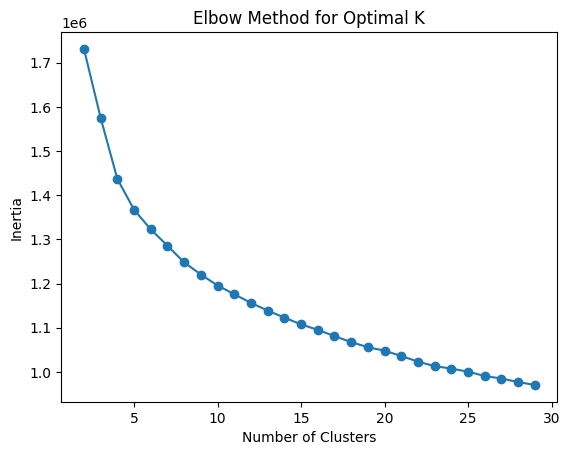

In [43]:
from sklearn.cluster import KMeans

# Finding optimal number of clusters using the Elbow Method
inertia = []
K_range = range(2, 30)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

import matplotlib.pyplot as plt

plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()


In [47]:
df_scaled

array([[ 1.18867228,  1.06032354, -0.27603981, ..., -0.30474846,
        -1.1326127 ,  0.        ],
       [ 1.50934123,  1.57657421,  0.07791605, ...,  0.56541969,
        -0.70039089,  0.        ],
       [ 0.6714643 ,  0.80421481,  0.56460536, ...,  1.00050376,
        -0.26816909,  0.        ],
       ...,
       [ 1.64381531,  1.59472365, -0.27603981, ..., -0.30474846,
        -0.70039089,  0.        ],
       [-1.05601036, -1.05106104, -0.27603981, ..., -0.30474846,
         0.16405271,  0.        ],
       [-1.50080923, -1.55722869, -0.27603981, ..., -0.73983253,
        -0.70039089,  0.        ]])

In [45]:
optimal_k = 10  # Chosen based on the elbow method
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(df_scaled)

# Analyzing Clusters
df.groupby('Cluster').mean()


TypeError: agg function failed [how->mean,dtype->object]

In [49]:
print(df_features[:10])

   CRSDepTime  DepTime  DepDelayMinutes  DepDelay  ArrTime  ArrDelayMinutes  \
0        1900   1855.0              0.0      -5.0   1927.0              0.0   
1        2055   2111.0             16.0      16.0   2316.0             27.0   
2        1650   1728.0             38.0      38.0   1903.0             43.0   
3        1845   1851.0              6.0       6.0   2214.0              0.0   
4        1200   1201.0              1.0       1.0   1639.0              0.0   
5        1055   1054.0              0.0      -1.0   1211.0              0.0   
6        1025   1022.0              0.0      -3.0   1352.0              0.0   
7         845    839.0              0.0      -6.0   1201.0              0.0   
8        1012   1002.0              0.0     -10.0   1304.0             10.0   
9        1558   1555.0              0.0      -3.0   1619.0              0.0   

   AirTime  CRSElapsedTime  ActualElapsedTime  Distance  Year  Quarter  Month  \
0     19.0            35.0               32.0    

<ipython-input-46-1920960139a6>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_features.columns, y=kmeans.cluster_centers_.mean(axis=0), palette="coolwarm")


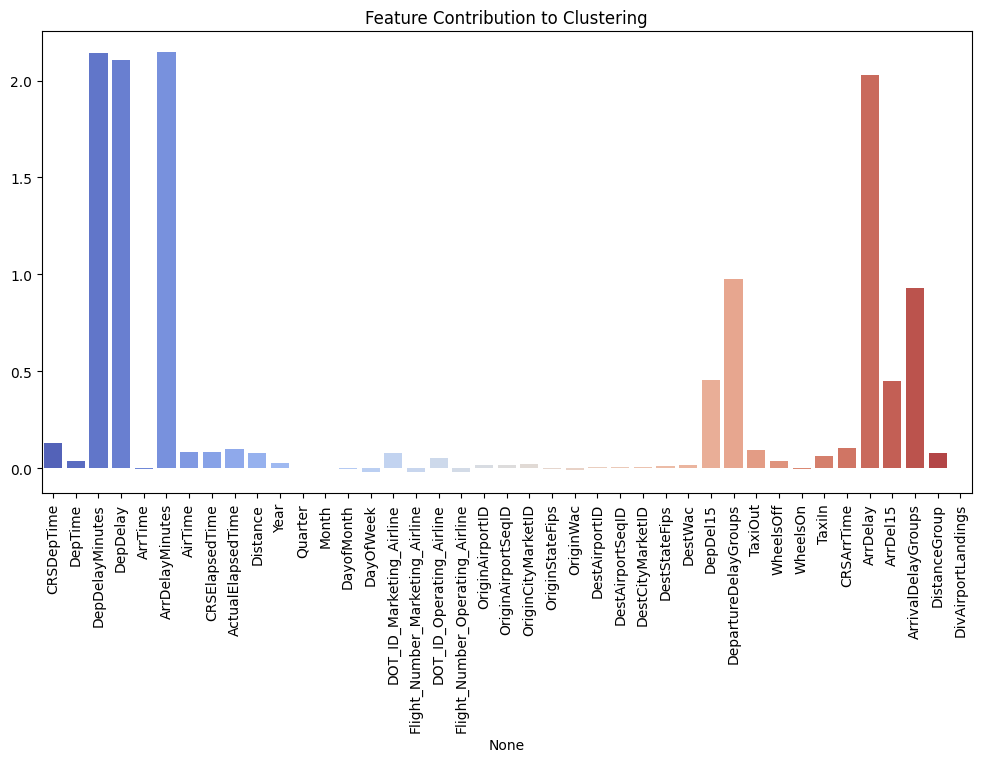

In [46]:
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(x=df_features.columns, y=kmeans.cluster_centers_.mean(axis=0), palette="coolwarm")
plt.xticks(rotation=90)
plt.title("Feature Contribution to Clustering")
plt.show()


## **PCA**

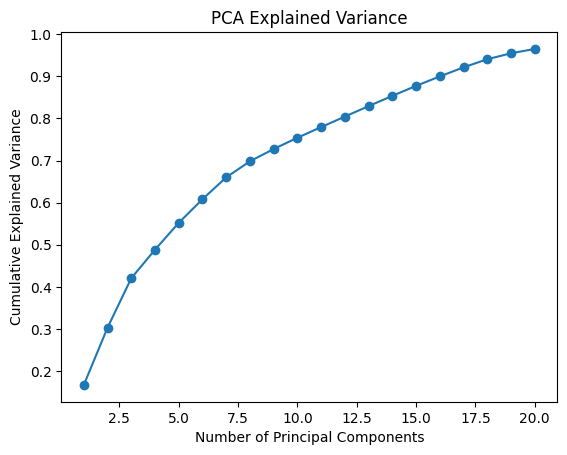

In [56]:
from sklearn.decomposition import PCA

pca = PCA(n_components=20)  # Reduce to 10 key features
df_pca = pca.fit_transform(df_scaled)

# Explained variance to see importance of top features
plt.plot(range(1, 21), pca.explained_variance_ratio_.cumsum(), marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance')
plt.show()


<ipython-input-57-216d45895c9d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=features_pca.index, y=features_pca.values, palette="coolwarm")


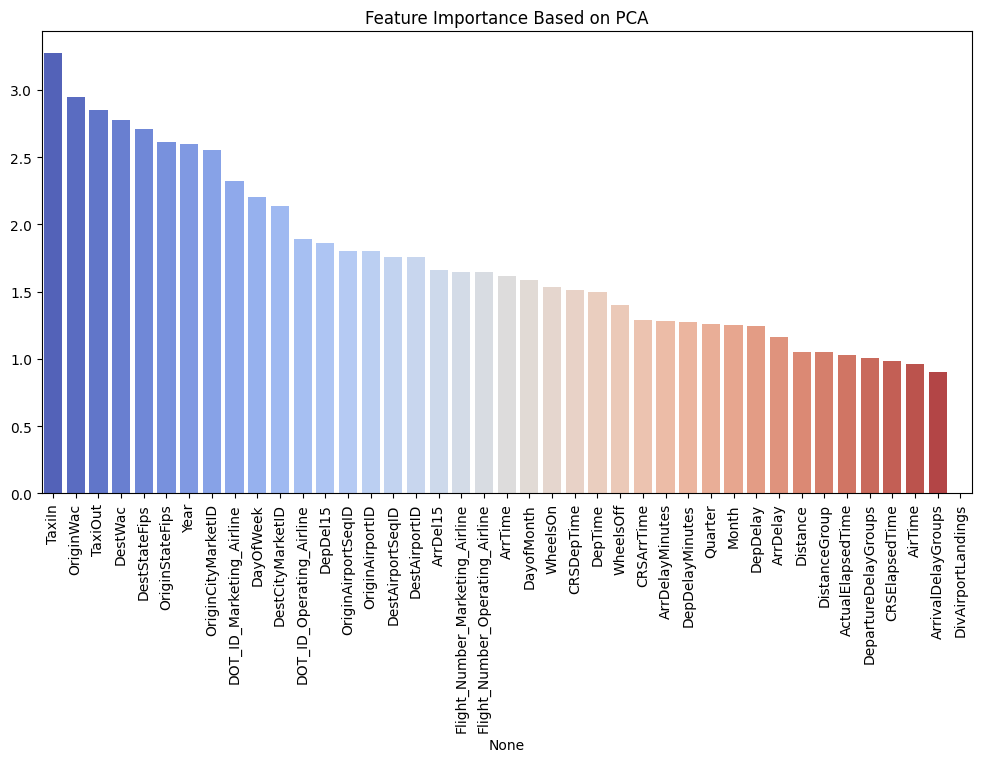

In [57]:
import numpy as np

# Get feature importance
feature_importance = np.abs(pca.components_).sum(axis=0)
features_pca = pd.Series(feature_importance, index=df_features.columns).sort_values(ascending=False)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=features_pca.index, y=features_pca.values, palette="coolwarm")
plt.xticks(rotation=90)
plt.title("Feature Importance Based on PCA")
plt.show()


In [58]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select relevant columns
features = ["DepDelayMinutes", "ArrDelayMinutes", "AirTime", "Distance"]
df_filtered = df[features].dropna()  # Drop missing values

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_filtered)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=2, random_state=42)  # 2 clusters: Delayed vs. Not Delayed
df_filtered["Cluster"] = kmeans.fit_predict(scaled_data)

# Assign Delay labels based on clustering
df_filtered["Delay"] = np.where(df_filtered["Cluster"] == 1, 1, 0)  # 1 = Delayed, 0 = Not Delayed

# Merge back with the original dataset
df["Delay"] = df_filtered["Delay"]
df["Delay"].fillna(0, inplace=True)  # Assume no delay for missing values


<ipython-input-58-a67fac05c4a8>:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Delay"].fillna(0, inplace=True)  # Assume no delay for missing values


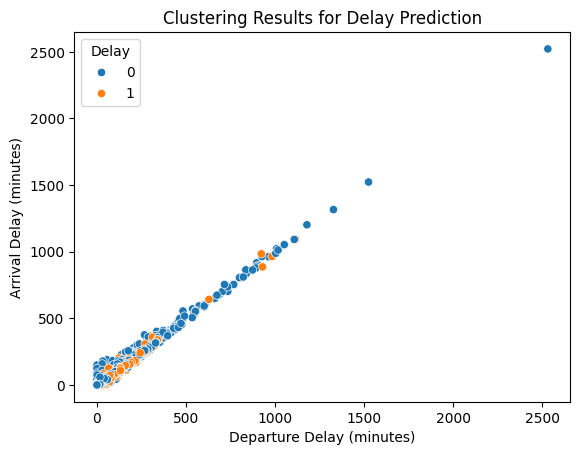

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x=df["DepDelayMinutes"], y=df["ArrDelayMinutes"], hue=df["Delay"])
plt.xlabel("Departure Delay (minutes)")
plt.ylabel("Arrival Delay (minutes)")
plt.title("Clustering Results for Delay Prediction")
plt.show()


In [60]:
df.head()

,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,ArrTime,ArrDelayMinutes,AirTime,CRSElapsedTime,ActualElapsedTime,Distance,Year,Quarter,Month,DayofMonth,DayOfWeek,Marketing_Airline_Network,Operated_or_Branded_Code_Share_Partners,DOT_ID_Marketing_Airline,IATA_Code_Marketing_Airline,Flight_Number_Marketing_Airline,Operating_Airline,DOT_ID_Operating_Airline,IATA_Code_Operating_Airline,Tail_Number,Flight_Number_Operating_Airline,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,DestCityName,DestState,DestStateFips,DestStateName,DestWac,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrDelay,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,DistanceGroup,DivAirportLandings,Cluster,Delay
0,2018-03-24,Hawaiian Airlines Inc.,LIH,HNL,False,False,1900,1855.0,0.0,-5.0,1927.0,0.0,19.0,35.0,32.0,102.0,2018,1,3,24,6,HA,HA,19690,HA,364,HA,19690,HA,N486HA,364,12982,1298202,32982,"Lihue, HI",HI,15,Hawaii,2,12173,1217305,32134,"Honolulu, HI",HI,15,Hawaii,2,0.0,-1.0,1900-1959,6.0,1901.0,1920.0,7.0,1935,-8.0,0.0,-1.0,1900-1959,1,0.0,0,0
1,2018-04-23,Endeavor Air Inc.,BOS,PIT,False,False,2055,2111.0,16.0,16.0,2316.0,27.0,80.0,114.0,125.0,496.0,2018,2,4,23,1,DL,DL_CODESHARE,19790,DL,3411,9E,20363,9E,N319PQ,3411,10721,1072102,30721,"Boston, MA",MA,25,Massachusetts,13,14122,1412202,30198,"Pittsburgh, PA",PA,42,Pennsylvania,23,1.0,1.0,2000-2059,22.0,2133.0,2253.0,23.0,2249,27.0,1.0,1.0,2200-2259,2,0.0,5,0
2,2018-02-16,Southwest Airlines Co.,HOU,ECP,False,False,1650,1728.0,38.0,38.0,1903.0,43.0,75.0,90.0,95.0,571.0,2018,1,2,16,5,WN,WN,19393,WN,369,WN,19393,WN,N904WN,369,12191,1219102,31453,"Houston, TX",TX,48,Texas,74,11481,1148102,31481,"Panama City, FL",FL,12,Florida,33,1.0,2.0,1600-1659,16.0,1744.0,1859.0,4.0,1820,43.0,1.0,2.0,1800-1859,3,0.0,5,0
3,2018-12-07,Southwest Airlines Co.,MDW,MCO,False,False,1845,1851.0,6.0,6.0,2214.0,0.0,127.0,150.0,143.0,990.0,2018,4,12,7,5,WN,WN,19393,WN,1627,WN,19393,WN,N7885A,1627,13232,1323202,30977,"Chicago, IL",IL,17,Illinois,41,13204,1320402,31454,"Orlando, FL",FL,12,Florida,33,0.0,0.0,1800-1859,9.0,1900.0,2207.0,7.0,2215,-1.0,0.0,-1.0,2200-2259,4,0.0,0,0
4,2018-06-03,Southwest Airlines Co.,LAS,LIT,False,False,1200,1201.0,1.0,1.0,1639.0,0.0,149.0,175.0,158.0,1294.0,2018,2,6,3,7,WN,WN,19393,WN,3826,WN,19393,WN,N495WN,3826,12889,1288903,32211,"Las Vegas, NV",NV,32,Nevada,85,12992,1299206,32600,"Little Rock, AR",AR,5,Arkansas,71,0.0,0.0,1200-1259,7.0,1208.0,1637.0,2.0,1655,-16.0,0.0,-2.0,1600-1659,6,0.0,7,1
